In [9]:
from FastCTQW.fastexpm import ExpMatFloat32
from scipy.linalg import expm

In [11]:
import numpy as np
MATRIX_SIZES = [16, 32, 64, 128, 256, 512, 1024]
for N in MATRIX_SIZES:
    A = np.random.normal(size = (N,N)).astype(np.float32)
    expMator = ExpMatFloat32(N)
    eA = expm(A)
    my_eA = expMator.run(A).reshape(N,N)
    error_matrix = eA - my_eA
    l2_norm = np.linalg.norm(eA-my_eA)
    l_inf_norm = np.linalg.norm(eA - my_eA, ord = np.inf)
    max_norm = np.max(np.abs(error_matrix))
    print(f"Random Matrix, N = {N}: ")
    print(f"  L2 Norm (Frobenius): {l2_norm:.4e}")
    print(f"  L_inf Norm (Max Row Sum): {l_inf_norm:.4e}")
    print(f"  Max Norm (Element-wise): {max_norm:.4e}")
    expMator.free()

Random Matrix, N = 16: 
  L2 Norm (Frobenius): 5.9241e-05
  L_inf Norm (Max Row Sum): 8.7321e-05
  Max Norm (Element-wise): 1.9073e-05
Random Matrix, N = 32: 
  L2 Norm (Frobenius): 5.3926e-04
  L_inf Norm (Max Row Sum): 9.6679e-04
  Max Norm (Element-wise): 9.5367e-05
Random Matrix, N = 64: 
  L2 Norm (Frobenius): 1.1055e-02
  L_inf Norm (Max Row Sum): 1.6949e-02
  Max Norm (Element-wise): 1.0071e-03
Random Matrix, N = 128: 
  L2 Norm (Frobenius): 1.6934e+00
  L_inf Norm (Max Row Sum): 2.7122e+00
  Max Norm (Element-wise): 7.0312e-02
Random Matrix, N = 256: 
  L2 Norm (Frobenius): 5.5963e+02
  L_inf Norm (Max Row Sum): 1.4237e+03
  Max Norm (Element-wise): 2.4375e+01
Random Matrix, N = 512: 
  L2 Norm (Frobenius): 2.8851e+10
  L_inf Norm (Max Row Sum): 5.9591e+10
  Max Norm (Element-wise): 4.3983e+08
Random Matrix, N = 1024: 
  L2 Norm (Frobenius): 8.3667e+14
  L_inf Norm (Max Row Sum): 2.1256e+15
  Max Norm (Element-wise): 8.4173e+12


In [32]:
from cupyx.scipy.linalg import expm as cu_expm
import cupy as cp

In [29]:
N = 250
A = np.random.normal(size = (N,N)).astype(np.float32)
expMator = ExpMatFloat32(N)
eA = expm(A)
my_eA = expMator.run(A).reshape(N,N)
error_matrix = eA - my_eA
l2_norm = np.linalg.norm(eA-my_eA)
l_inf_norm = np.linalg.norm(eA - my_eA, ord = np.inf)
max_norm = np.max(np.abs(error_matrix))

In [30]:
my_eA

array([[-1.40183506e+04,  4.32888281e+03,  1.52622490e+04, ...,
         6.29795977e+04,  5.13595781e+04,  7.24717734e+04],
       [ 3.81726328e+04, -3.37673633e+04, -3.49952422e+04, ...,
         1.65710594e+05,  5.32116089e+01,  9.54032656e+04],
       [ 4.84020391e+04,  6.23716406e+04, -9.80892578e+04, ...,
         3.69080508e+04,  5.79456445e+04, -2.84325215e+04],
       ...,
       [ 1.47862984e+05,  8.03399766e+04, -4.44608516e+04, ...,
         3.47785742e+03,  9.21236816e+03, -1.03465312e+04],
       [-2.80091719e+04, -3.66422539e+04,  4.48944883e+04, ...,
         7.78525156e+04,  3.94817188e+04,  9.09396328e+04],
       [-1.95100645e+04, -5.45394609e+04,  4.71549766e+04, ...,
         1.04534234e+05,  7.52267891e+04,  2.86255938e+05]],
      shape=(250, 250), dtype=float32)

In [31]:
eA

array([[-1.40186309e+04,  4.32928613e+03,  1.52622686e+04, ...,
         6.29796602e+04,  5.13589766e+04,  7.24716719e+04],
       [ 3.81726484e+04, -3.37675664e+04, -3.49941289e+04, ...,
         1.65711000e+05,  5.33012581e+01,  9.54037109e+04],
       [ 4.84034688e+04,  6.23716289e+04, -9.80903516e+04, ...,
         3.69078789e+04,  5.79464453e+04, -2.84332559e+04],
       ...,
       [ 1.47863484e+05,  8.03395234e+04, -4.44617539e+04, ...,
         3.47819653e+03,  9.21265820e+03, -1.03467373e+04],
       [-2.80091484e+04, -3.66418906e+04,  4.48943242e+04, ...,
         7.78528125e+04,  3.94816133e+04,  9.09404062e+04],
       [-1.95098340e+04, -5.45389531e+04,  4.71544570e+04, ...,
         1.04533695e+05,  7.52256250e+04,  2.86257688e+05]],
      shape=(250, 250), dtype=float32)

In [3]:
eA = np.random.normal(size = (100,100))
my_eA =  np.random.normal(size = (100,100))
error_matrix = eA - my_eA
l2_norm = np.linalg.norm(eA-my_eA)
l_inf_norm = np.linalg.norm(eA - my_eA, ord = np.inf)
max_norm = np.max(np.abs(error_matrix))

In [16]:
import fastexpm_old
import numpy as np
import cupyx.scipy.linalg 
import math
import cupy
import cmath
import gc
import networkx as nx
import time
import qwak_cupy
def matrix_exp_taylor(A: np.ndarray, m: int = 20, tol: float = 1e-10) -> np.ndarray:
    """
    使用泰勒级数结合缩放和平方法计算矩阵指数 exp(A)`。

    泰勒级数：exp(A) ≈ I + A + A^2/2! + ... + A^m/m!
    缩放和平方法：先计算 exp(A/2^s)，然后通过 s 次平方得到 exp(A)`。

    参数:
        A: 输入的方阵，类型为 numpy.ndarray。
        m: 泰勒级数的最大阶数（默认 20）。
        tol: 收敛容差，当前项范数小于此值时停止迭代（默认 1e-10）。

    返回:
        expA: 计算得到的 exp(A) 的近似值。
    """
    assert A.shape[0] == A.shape[1], "矩阵 A 必须为方阵"
    n = A.shape[0]

    # 计算矩阵范数并确定缩放因子 s
    norm_A = np.linalg.norm(A, ord=1)  # 使用 1-范数
    if norm_A == 0:
        return np.eye(n, dtype=A.dtype)

    # 确定缩放因子 s，使得 A/2^s 的范数较小
    s = max(0, int(np.ceil(np.log2(norm_A))))  # 确保范数归一化到 [0,1]
    scaling_factor = 2 ** s
    # 缩放矩阵
    A_scaled = A / scaling_factor

    # 初始化泰勒级数
    expA_scaled = np.eye(n, dtype=A.dtype)  # 单位矩阵 I
    term = np.eye(n, dtype=A.dtype)    # 当前项 A^k / k!

    # 计算泰勒级数展开
    for k in range(1, m + 1):
        term = term @ A_scaled / k  # 递推计算 A_scaled^k / k!
        expA_scaled += term
        # 检查收敛
        if np.linalg.norm(term, ord='fro') < tol:
            break

    # 通过 s 次平方恢复 exp(A)
    expA = expA_scaled.copy()
    for _ in range(s):
        expA = expA @ expA

    return expA

ImportError: cannot import name 'fastexpm' from 'fastexpm_old' (consider renaming '/home/hxy/expm/pade/CTQW_project/FastCTQW_project/test/fastexpm_old/__init__.py' if it has the same name as a library you intended to import)

In [3]:
from scipy.linalg import expm


In [4]:
# G = nx.gnp_random_graph(n = 10000, p = 0.05)
# A = nx.to_numpy_array(G).astype(np.float32)
N = 1000
A = np.random.normal(loc = 0, scale=0.05, size = (N, N)).astype(np.float64)*1j

In [5]:
A_cupy = cupy.array(A)
eA_cupy = cupyx.scipy.linalg.expm(A_cupy).get()

In [6]:
expMat_Complex64 = fastexpm.ExpMatComplex128(N)

In [7]:
my_eA = expMat_Complex64.run(A).reshape(N,N)

In [8]:
eA = expm(A)

In [9]:
np.linalg.norm(eA_cupy - my_eA)

np.float64(9.513149067526091e-07)

In [10]:
np.linalg.norm(my_eA - eA)

np.float64(9.513148776615838e-07)

In [11]:
np.linalg.norm(eA - eA_cupy)

np.float64(1.9827438182888525e-12)

In [8]:
import time
from tqdm import tqdm
import numpy as np
from scipy.linalg import expm
from fastexpm import ExpMatFloat32,ExpMatFloat64, ExpMatComplex64, ExpMatComplex128
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
def test_cpu(A, num):    
    lt = []
    for i in range(num):
        start = time.time()
        expm(A);
        end = time.time()
        lt.append(end - start)
    return lt
    
def test_gpu(expMator:ExpMatComplex64, A, num):
    lt = []
    for i in range(num):
        time.sleep(0.2)
        start = time.time()
        expMator.run(A);
        end = time.time()
        lt.append(end - start)
    return lt




In [12]:
time_gpus = []

N_sequence_complex = [
    16, 32, 64, 128, 256,
    512, 1024, 2048, 4096,
    6144, 7000, 7500 # 请根据您实际能跑通的最大值进行调整，并在末尾添加一些中间点使曲线更平滑
]

In [13]:
np.random.seed(seed = 0)
for N in tqdm(N_sequence_complex):
    A = np.ones(shape = (N,N), dtype = np.complex128) - np.eye(N,dtype= np.complex128)
    # expMator = ExpMatComplex64(N)
    A = 1j*A
    expMator = ExpMatComplex128(N)
    # time_cpus.append(test_cpu(A, 5))
    time_gpus.append(test_gpu(expMator, A, 5))
    expMator.free()

100%|██████████| 12/12 [1:04:29<00:00, 322.47s/it]


In [14]:
time_gpus_arr = np.array(time_gpus)

In [15]:
pd.DataFrame(time_gpus_arr).to_csv("fastexpm_double_perf.csv")

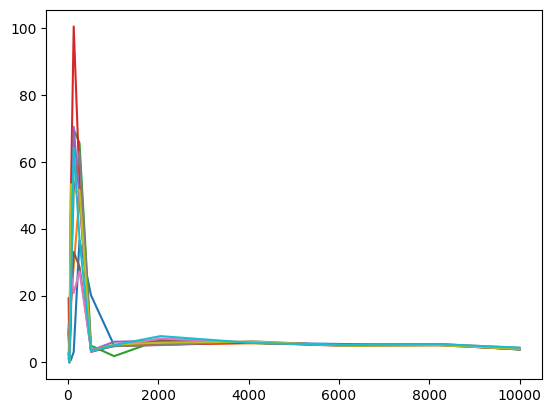

In [24]:
plt.plot(N_sequence_complex64,np.array(time_cpus) / np.array(time_gpus))

In [20]:
np.array(time_gpus)

array([5.28657436e-02, 1.42672062e-02, 4.18066978e-03, 4.64689732e-02,
       4.27937508e-03, 8.38160515e-03, 2.82738209e-02, 1.66586399e-01,
       1.23373270e+00, 3.98390388e+00, 9.97519827e+00, 2.07316377e+01])

In [3]:
N = 7500
A = 1j*(np.ones(shape = (N,N), dtype = np.complex128) - np.eye(N))
expMator = ExpMatComplex128(N)
expMator.run(A)
expMator.free()

In [4]:
N = 11100
(N*N*8) * 8 / (1024**3)

7.343888282775879

In [8]:
np.sqrt(7.343888282775879 * (1024**3) / (8*16))

np.float64(7848.885271170678)

In [7]:
N = 11000
N * N * 8 * 8 / (1024**3)

7.212162017822266

In [15]:
expMator.free()

In [3]:
time_gpus = []

A = 1j*(np.ones(shape = (100,100), dtype = np.complex64) - np.eye(100))
expMator = ExpMatComplex64(100)
expMator.run(A)
expMator.free()
for N in tqdm(np.arange(1000, 10000 + 1000, 1000)):
    A = 1j*(np.ones(shape = (N,N), dtype = np.complex64) - np.eye(N))
    expMator = ExpMatComplex64(N)
    time_gpus.append(test_gpu(expMator, A, 10))
    expMator.free()

100%|██████████| 10/10 [11:08<00:00, 66.84s/it] 


In [12]:
time_gpus_min = np.array(time_gpus).min(axis = 1)

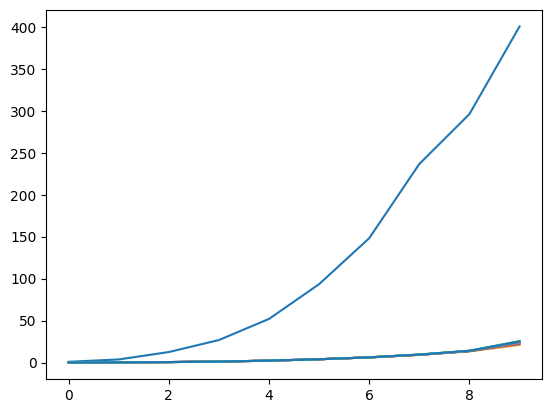

In [17]:
plt.plot(time_cpus)
plt.plot(time_gpus)

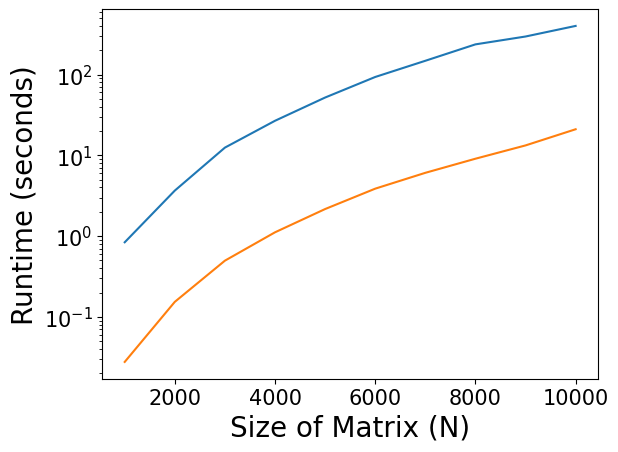

In [13]:
# plt.figure(figsize=(10, 8), dpi = 200)
plt.plot(np.arange(1000, 10000 + 1000, 1000), time_cpus)
plt.plot(np.arange(1000, 10000 + 1000, 1000), time_gpus_min)
plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Size of Matrix (N)', fontsize = 20)
plt.ylabel('Runtime (seconds)', fontsize = 20)
plt.show()

In [15]:
time_cpu_arr

array([  0.83791184,   3.65940428,  12.46402431,  26.79218268,
        51.972543  ,  93.39920974, 148.20135498, 236.64389086,
       296.0953753 , 400.47616696])

In [29]:
time_gpu_arr

array([ 0.14971733,  0.51285815,  1.12172174,  2.36266375,  4.07859254,
        6.5597043 ,  9.57422233, 13.25166082, 21.05809569, 34.36052513])

In [31]:
speed_up_arr

array([ 5.59662558,  7.13531463, 11.11151171, 11.33982046, 12.7427642 ,
       14.23832621, 15.47920551, 17.85767792, 14.06088089, 11.65512359])

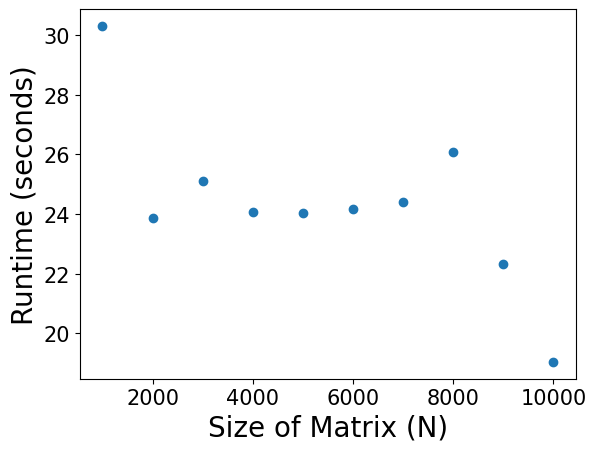

In [14]:
time_cpu_arr = np.asarray(time_cpus)
time_gpu_arr = np.asarray(time_gpus_min)
speed_up_arr = time_cpu_arr / time_gpu_arr
# plt.figure(figsize=(10, 8), dpi = 200)
plt.scatter(np.arange(1000, 10000 + 1000, 1000), speed_up_arr)
# plt.yscale('log')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
# plt.ylim(15,30)
plt.xlabel('Size of Matrix (N)', fontsize = 20)
plt.ylabel('Runtime (seconds)', fontsize = 20)
plt.show()

In [9]:
time_cpus = []
time_gpus = []
for N in tqdm(np.arange(1000, 10000 + 1000, 1000)):
    A = 1j*(np.ones(shape = (N,N), dtype = np.complex128) - np.eye(N))
    expMator = ExpMatComplex64(N)
    time_cpus.append(test_cpu(A))
    time_gpus.append(test_gpu(expMator, A))
    expMator.free()

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])

In [56]:
import time
import psutil
import os
import numpy as np # For dummy matrix

def run_your_expMator_in_python(exp_mator_instance, matrix_A):
    """
    一个模拟你的 expMator.run(A) 的函数，
    实际使用时替换为你的 Pybind11 绑定代码。
    """
    print(f"Starting computation for matrix of shape: {matrix_A.shape}")
    _ = [i * i for i in range(1000000)] # User time
    print("Calling expMator.run(A) (your C++/CUDA code)...")
    exp_mator_instance.run(matrix_A)
    _ = [str(i) for i in range(500000)] # User time
    print("Computation finished.")

# 创建一个 dummy expMator_instance
class DummyExpMator:
    def __init__(self):
        print("DummyExpMator initialized.")
    def run(self, A):
        # 模拟 C++/CUDA 操作，包括潜在的系统调用
        time.sleep(0.5) # 模拟GPU计算和传输时间
        # 模拟系统调用开销
        # 制造一些I/O或其他需要内核交互的行为，以增加sys time
        # For a more realistic sys time simulation, one might actually open/close files
        # or do something that frequently hits the OS kernel.
        # Here, just a small sleep for illustration
        time.sleep(0.15) # Simulating more system-level waiting/overhead
        print("  (Dummy) expMator.run executed.")
        return A # Return something if needed

# --- 实际使用示例 ---
if __name__ == "__main__":
    expMator_instance = DummyExpMator()
    dummy_matrix_A = np.random.rand(1024, 1024).astype(np.complex64)

    # 获取当前进程对象
    process = psutil.Process(os.getpid())

    print("--- Measuring CPU Times with psutil ---")

    # 记录开始时的 CPU 时间
    cpu_times_before = process.cpu_times()
    wall_time_start = time.perf_counter()

    # 运行你的代码
    run_your_expMator_in_python(expMator_instance, dummy_matrix_A)

    # 记录结束时的 CPU 时间
    cpu_times_after = process.cpu_times()
    wall_time_end = time.perf_counter()

    # 计算差值
    user_time = cpu_times_after.user - cpu_times_before.user
    system_time = cpu_times_after.system - cpu_times_before.system
    total_cpu_time = user_time + system_time
    wall_time = wall_time_end - wall_time_start

    print(f"\n--- Results (from psutil) ---")
    print(f"CPU times: user {user_time:.3f} s, sys: {system_time:.3f} s, total: {total_cpu_time:.3f} s")
    print(f"Wall time: {wall_time:.3f} s")

DummyExpMator initialized.
--- Measuring CPU Times with psutil ---
Starting computation for matrix of shape: (1024, 1024)
Calling expMator.run(A) (your C++/CUDA code)...
  (Dummy) expMator.run executed.
Computation finished.

--- Results (from psutil) ---
CPU times: user 0.100 s, sys: 0.020 s, total: 0.120 s
Wall time: 0.767 s
